# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [1]:
# Import libraries and packages.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.
data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

A: It is useful to perform exploratory data analysis prior to constructing a linear regression model to inspect the distribution of the values from the dataset by observing the statistical values like mean, maximum, minimum, and median, predict which linear relationship exists between the variables by identifying the independent and dependent variables, and verify whether there are any missing values present in the dataset.

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

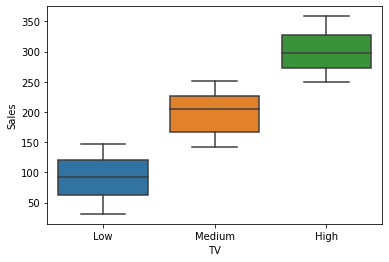

In [3]:
# Create a boxplot with TV and Sales.

sns.boxplot(x="TV", y="Sales", data=data)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `seaborn` library that creates a boxplot showing the distribution of a variable across multiple groups.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `boxplot()` function from `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `TV` as the `x` argument, `Sales` as the `y` argument, and `data` as the `data` argument.

</details>

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

A: There is a variation in Sales based on the TV promotion budget, such as the higher Sales range of values for high TV budget than the medium and low ones.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

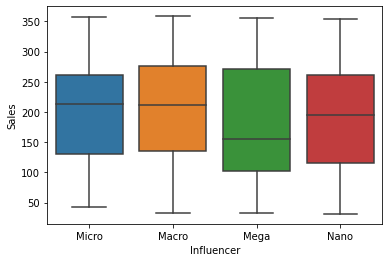

In [4]:
# Create a boxplot with Influencer and Sales.
sns.boxplot(x="Influencer", y="Sales", data=data)

**Question:** Is there variation in `Sales` based off the `Influencer` size?

A: There isn't any variation in Sales based on the Influencer size as the distribution appears to be evenly normal.

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [5]:
# Drop rows that contain missing data and update the DataFrame.
data = data.dropna(axis=0)

# Confirm the data contains no missing values.
data.isna().any().sum()

0

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Verify the data is updated properly after the rows containing missing data are dropped.

</details>

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [6]:
# Define the OLS formula.
# Try using the TV promotional budget as the categorical variable for this model.
formula = "Sales ~ C(TV)"

# Create an OLS model.
ols_model = ols(formula=formula, data=data)

# Fit the model.
fit_ols = ols_model.fit()

# Save the results summary.
results = fit_ols.summary()

# Display the model results.
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          8.81e-256
Time:                        16:42:25   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to code you've written to fit linear regression models.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function from `statsmodels.formula.api`, which creates a model from a formula and DataFrame, to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `C()` around the variable name in the ols formula to indicate a variable is categorical.
    
Be sure the variable string names exactly match the column names in `data`.

</details>

**Question:** Which categorical variable did you choose for the model? Why?

A: The categorical variable selected for the model is TV because it appears to be a strong predictor for the Sales value, given the fact that the average sales for high TV budget is significantly higher than medium and low TV budgets.

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

A: The linearity assumption is met as there is a clear relationship between the overall Sales and TV promotional budget.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

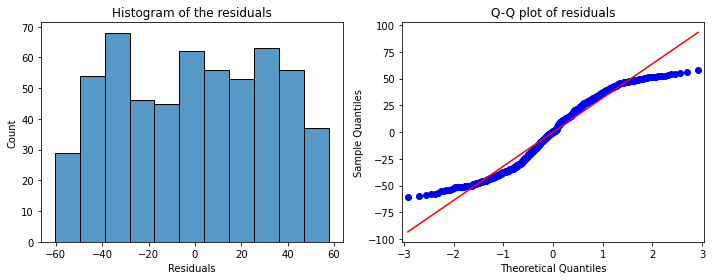

In [7]:
# Calculate the residuals.
residuals = fit_ols.resid

figure, axes = plt.subplots(1, 2, figsize=(10, 4))

# Create a histogram with the residuals. 
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residuals")
axes[0].set_title("Histogram of the residuals")

# Create a QQ plot of the residuals.
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title("Q-Q plot of residuals")

plt.tight_layout()
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the QQ-plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?

A: The normality assumption is met, as the residuals appears to be normally distributed, and the majority of the values align with the straight linear line.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

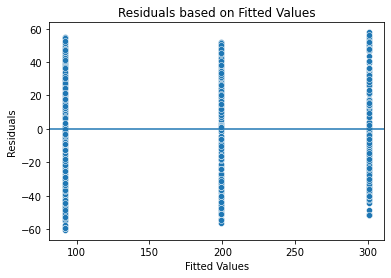

In [8]:
# Create a scatter plot with the fitted values from the model and the residuals.
figure = sns.scatterplot(x=fit_ols.fittedvalues, y=residuals)
figure.set_xlabel("Fitted Values")
figure.set_ylabel("Residuals")
figure.set_title("Residuals based on Fitted Values")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
figure.axhline(0)
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

A: The constant variance or homoscedasticity assumption is met as the fitted values appears to be similarily distributed.

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [9]:
# Display the model results summary.
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          8.81e-256
Time:                        16:42:25   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?

A: The R-squared value for the model is 0.874, meaning that 87.4% of the variation in Sales can be explained by the model.

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

A: The coefficient estimates for the low and medium TV budget sales indicates that the average sales made is lower than the high TV budget sales. Both the low and medium TV budgets would make 208.8133 and 101.5061 million dollars less on average in total amount of sales than the high TV budget. Since all the coefficients have a p-value of 0.0000, they are statistically significant at the significance level of p=0.05. For the 95% confidence interval, there is a 95% chance that the true value will fall between the range of [295.783, 305.276] for the y-intercept, [-215.353, -202.274] for low TV budget, and [-108.038, -94.975] for medium TV budget.

**Question:** Do you think your model could be improved? Why or why not? How?

A: If there are any improvements to be made for the model, then adding additional categorical variables and actual TV budget values could help provide a more in-depth overview of the TV promotions. Furthermore, adding variables like location and date-time could be useful in future studies.

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [10]:
# Create an one-way ANOVA table for the fit model.
sm.stats.anova_lm(fit_ols, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.052692e+06,2.026346e+06,1971.455737,8.805550e-256
Residual,566.0,5.817589e+05,1.027843e+03,NaN,NaN


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a one-way ANOVA test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in `statsmodels.api` (i.e. `sm`) that peforms an ANOVA test for a fit linear model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `anova_lm()` function from `sm.stats`. Specify the type of ANOVA test (for example, one-way or two-way), using the `typ` parameter.
   

</details>

**Question:** What are the null and alternative hypotheses for the ANOVA test?

A: The null and alternative hypotheses for the ANOVA test are described as followed:

Null hypothesis: TV(low) = TV(medium) = TV(high) [No difference in the average amount of sales exist based on the TV promotional budget.]

Alternative hypothesis: NOT TV(low) = TV(medium) = TV(high) [There is a difference in the average amount of sales based on the TV promotional budget.]

**Question:** What is your conclusion from the one-way ANOVA test?

A: Based on the results from the one-way ANOVA test, the p-value is almost close to 0 and less than 0.05 of the significance value. This means the null hypothesis can be rejected that there is no difference in the average amount of sales by TV budget.

**Question:** What did the ANOVA test tell you?

A: With the null hypothesis rejected, there is a significant difference in the amount of sales made based on the TV promotion budget categorical groups.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [11]:
# Perform the Tukey's HSD post hoc test.
tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"], alpha = 0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a Tukey's HSD post hoc test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pairwise_tukeyhsd()` function from `statsmodels.stats.multicomp`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `endog` argument in `pairwise_tukeyhsd` indicates which variable is being compared across groups (i.e., `Sales`). The `groups` argument in `pairwise_tukeyhsd` tells the function which variable holds the group you’re interested in reviewing.

</details>

**Question:** What is your interpretation of the Tukey HSD test?

A: The reject column from the Tukey HSD test is a boolean that indicates whether or not the null hypothesis can be rejected based on the two categorical groups being compared. Since all three of the reject values are True (that is, for [High, Low], [High, Medium], and [Low, Medium]), the null hypothesis can be rejected for all three pairwise comparison groups.

**Question:** What did the post hoc tell you?**

A: The post hoc test is more effective at comparing different groups of categorical variables than one-way ANOVA, and is also much better at minimizing false positives and negatives when performing multiple tests at a time. In short, with the null hypothesis rejected, the Sales tend to vary and differ based on the TV budget categories.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

A: One-way ANOVA and ANOVA post hoc tests can be used to determine whether a significant difference exists in the continuous dependent variable based on three or more groups of categorical independent variables.


**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

A: The average sales made for high TV budget is higher than the medium TV budget, which is also higher than the low TV budget. Given that the mean sales between those three categories are significantly different, it can be concluded that the average Sales do tend to vary based on the amount of budget allocated for TV promotions. The R-squared value of 0.874 indicates that 87.4% of the variation in Sales can be explained by the model. The ANOVA tests (one-way and post hoc) shows that there is a significant difference in the average amount of sales made based on the categories of the TV promotion budgets.

#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.